In [1]:
import numpy as np
import pandas as pd
path ='https://github.com/DS-100/textbook/raw/master/content/'
students = pd.read_csv(path + 'ch/01/roster.csv')
students

,Name,Role
0,Keeley,Student
1,John,Student
2,BRYAN,Student
3,Kaylan,Student
4,Sol,Student
...,...,...
274,Sukhbir,Student
275,Nicholas,Waitlist Student
276,Ernesto,Waitlist Student
277,Athan,Waitlist Student


In [2]:
students['Name'] = students['Name'].str.lower()
students

,Name,Role
0,keeley,Student
1,john,Student
2,bryan,Student
3,kaylan,Student
4,sol,Student
...,...,...
274,sukhbir,Student
275,nicholas,Waitlist Student
276,ernesto,Waitlist Student
277,athan,Waitlist Student


In [3]:
print("There are", len(students),
      "students on the roster.")

There are 279 students on the roster.


In [4]:
students['Role'].value_counts().to_frame()

,Role
Student,237
Waitlist Student,42


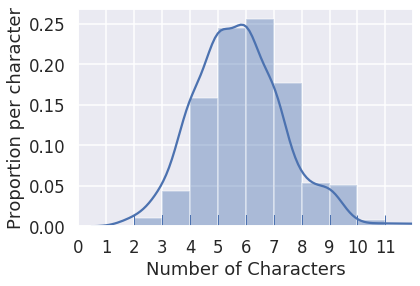

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.distplot(students['Name'].str.len(),  rug=True,
 bins=np.arange(12), axlabel="Number of Characters")
plt.xlim(0, 12)
plt.xticks(np.arange(12))
plt.ylabel('Proportion per character');

In [6]:
students['Name'][5]

'jerry'

In [7]:
import urllib.request
import os.path

data_url = "https://www.ssa.gov/oact/babynames/names.zip"
local_filename = "babynames.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())
        
import zipfile
babynames = [] 
with zipfile.ZipFile(local_filename, "r") as zf:
    data_files = [f for f in zf.filelist if f.filename[-3:] == "txt"]
    def extract_year_from_filename(fn):
        return int(fn[3:7])
    for f in data_files:
        year = extract_year_from_filename(f.filename)
        with zf.open(f) as fp:
            df = pd.read_csv(fp, names=["Name", "Sex", "Count"])
            df["Year"] = year
            babynames.append(df)
babynames = pd.concat(babynames)
babynames

,Name,Sex,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
32028,Zylas,M,5,2018
32029,Zyran,M,5,2018
32030,Zyrie,M,5,2018
32031,Zyron,M,5,2018


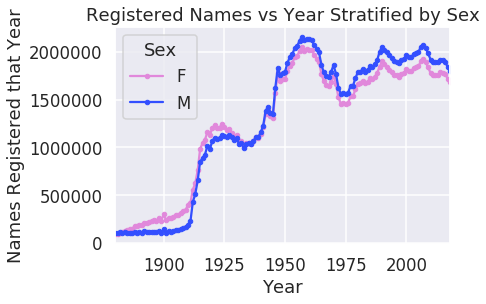

In [8]:
pivot_year_name_count = pd.pivot_table(
    babynames, index='Year', columns='Sex',
    values='Count', aggfunc=np.sum)

pink_blue = ["#E188DB", "#334FFF"]
with sns.color_palette(sns.color_palette(pink_blue)):
    pivot_year_name_count.plot(marker=".")
    plt.title("Registered Names vs Year Stratified by Sex")
    plt.ylabel('Names Registered that Year')

In [9]:
babynames['Name'] = babynames['Name'].str.lower()
babynames

,Name,Sex,Count,Year
0,mary,F,7065,1880
1,anna,F,2604,1880
2,emma,F,2003,1880
3,elizabeth,F,1939,1880
4,minnie,F,1746,1880
...,...,...,...,...
32028,zylas,M,5,2018
32029,zyran,M,5,2018
32030,zyrie,M,5,2018
32031,zyron,M,5,2018


In [10]:
sex_counts = pd.pivot_table(babynames, index='Name',
  columns='Sex', values='Count', aggfunc='sum', 
  fill_value=0., margins=True)
sex_counts

Sex,F,M,All
Name,,,
aaban,0,114,114
aabha,35,0,35
aabid,0,16,16
aabidah,5,0,5
aabir,0,10,10
...,...,...,...
zyvon,0,7,7
zyyanna,6,0,6
zyyon,0,6,6


In [11]:
prop_female = sex_counts['F'] / sex_counts['All']
sex_counts['prop_female'] = prop_female
sex_counts

Sex,F,M,All,prop_female
Name,,,,
aaban,0,114,114,0.000000
aabha,35,0,35,1.000000
aabid,0,16,16,0.000000
aabidah,5,0,5,1.000000
aabir,0,10,10,0.000000
...,...,...,...,...
zyvon,0,7,7,0.000000
zyyanna,6,0,6,1.000000
zyyon,0,6,6,0.000000


In [12]:
def sex_from_name(name):
    if name in sex_counts.index:
        prop = sex_counts.loc[name, 'prop_female']
        return 'F' if prop > 0.5 else 'M'
    else:
        return 'Name not in dataset'

sex_from_name('sam')

'M'

In [13]:
import ipywidgets as widgets
from ipywidgets import interact
interact(sex_from_name, name='sam');

interactive(children=(Text(value='sam', description='name'), Output()), _dom_classes=('widget-interact',))

In [14]:
students['sex'] = students['Name'].apply(sex_from_name)
students

,Name,Role,sex
0,keeley,Student,F
1,john,Student,M
2,bryan,Student,M
3,kaylan,Student,F
4,sol,Student,M
...,...,...,...
274,sukhbir,Student,Name not in dataset
275,nicholas,Waitlist Student,M
276,ernesto,Waitlist Student,M
277,athan,Waitlist Student,M


In [15]:
students['sex'].value_counts()

M                      145
F                       92
Name not in dataset     42
Name: sex, dtype: int64

In [16]:
def avg_year(group):
    return np.average(group['Year'], weights=group['Count'])

avg_years = (babynames.groupby('Name').apply(avg_year)
    .rename('avg_year').to_frame())
avg_years

,avg_year
Name,
aaban,2013.333333
aabha,2013.714286
aabid,2012.687500
aabidah,2018.000000
aabir,2017.000000
...,...
zyvion,2009.000000
zyvon,2015.000000
zyyanna,2010.000000


In [17]:
def year_from_name(name):
    return (avg_years.loc[name, 'avg_year']
            if name in avg_years.index
            else None)

interact(year_from_name, name='fernando');

interactive(children=(Text(value='fernando', description='name'), Output()), _dom_classes=('widget-interact',)…

In [18]:
students['year'] = students['Name'].apply(year_from_name)
students

,Name,Role,sex,year
0,keeley,Student,F,1998.668050
1,john,Student,M,1951.328445
2,bryan,Student,M,1983.875858
3,kaylan,Student,F,1998.898387
4,sol,Student,M,1951.015222
...,...,...,...,...
274,sukhbir,Student,Name not in dataset,NaN
275,nicholas,Waitlist Student,M,1988.390891
276,ernesto,Waitlist Student,M,1982.014863
277,athan,Waitlist Student,M,2005.485599


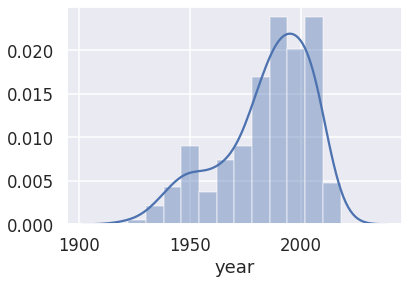

In [19]:
sns.distplot(students['year'].dropna());

In [20]:
students['year'].mean()

1984.714780016429

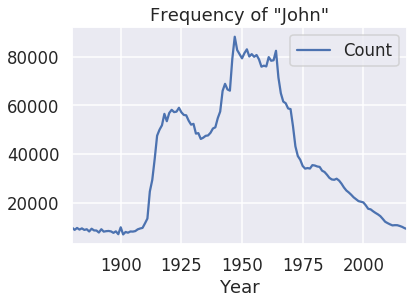

In [21]:
names = babynames.set_index('Name').sort_values('Year')
john = names.loc['john']
john[john['Sex'] == 'M'].plot('Year', 'Count')
plt.title('Frequency of "John"');

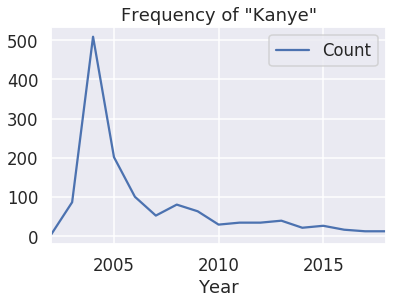

In [22]:
names = babynames.set_index('Name').sort_values('Year')
kanye = names.loc['kanye']
kanye[kanye['Sex'] == 'M'].plot('Year', 'Count')
plt.title('Frequency of "Kanye"');